# Install libraries

In [4]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Dataset, metadata and data exploration 

In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

The training sample contains 50000 images, each composed of 32 x 32 pixels with 3 channels (R,G,B)

In [7]:
X_test.shape

(10000, 32, 32, 3)

The test sample contains 10000 images, each with 32 x 32 pixels with 3 channels (R,G,B). This is  a decent sized test sample. Not too small. 

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Above code checks each of the training samples. 

In [11]:
y_train.shape

(50000, 1)

This has 5000 samples with one dimension 

In [13]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

Here, 6 is frog, 9 is ship, 9 is ship, 4 is deer, 1 is automobile etc. This is a 2 dimensional array and we only need the categhory. I will re-shape this to a one dimensional array using the re-shape function of numpy. We want to keep the first dimension: x_test = 10000 (basically as it is) therefore we should add -1, and leave blank for the second dimension: y_test so that it flattens it.

In [15]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
classes[7]

'horse'

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

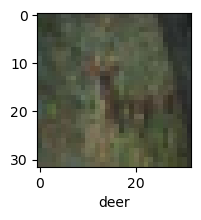

In [19]:
plot_sample(X_train, y_train, 10)

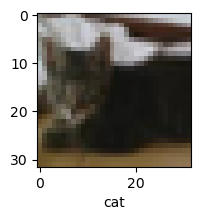

In [20]:
plot_sample(X_train, y_train, 9)

# Data Normalisation - Missing the validation set?

Whenever working with images we want to divide each pixel value by 255, as each pixel values range from 0 to 255 for each channel. If divided by 255 we will be normalising data into a 0-1 range. 

In [23]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [24]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

 # Build simple ANN to see how well the model performs with this as a way to compare to a CNN

In [139]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define the ANN model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

# Compile the model
ann.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model
ann.fit(X_train, y_train, epochs=10)

# Evaluate the model on the test set
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 10), output.shape=(32, 10)

In [28]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5123 - loss: 1.3740


[1.3779306411743164, 0.5105000138282776]

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.49      0.56      1000
           1       0.60      0.71      0.65      1000
           2       0.36      0.44      0.40      1000
           3       0.42      0.23      0.29      1000
           4       0.37      0.57      0.45      1000
           5       0.38      0.53      0.44      1000
           6       0.56      0.61      0.58      1000
           7       0.70      0.46      0.55      1000
           8       0.65      0.63      0.64      1000
           9       0.68      0.43      0.53      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.51     10000
weighted avg       0.54      0.51      0.51     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

The ANN is performing really bad on the 10-epochs dataset. For example for class 7 (horse) we only have a 36% accuracy. 

# CNN Built and Train

# Test 0: 2 layers with 20  filters each

CNN will have a couple of layers: convolution + ReLU the pooling, then repeat then a dense network. We already build the classification model above. all we have to do is add the Feature extraction. The model below has 2 covolutional layers, with 20 filters each.

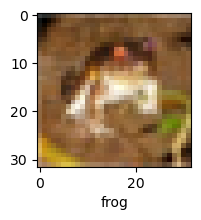

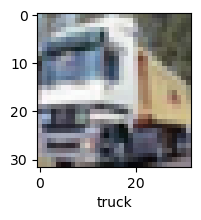

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3390 - loss: 1.7812 - val_accuracy: 0.5384 - val_loss: 1.2934
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5489 - loss: 1.2670 - val_accuracy: 0.5924 - val_loss: 1.1563
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6082 - loss: 1.1125 - val_accuracy: 0.6019 - val_loss: 1.1529
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6450 - loss: 1.0205 - val_accuracy: 0.6324 - val_loss: 1.0518
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6634 - loss: 0.9635 - val_accuracy: 0.6419 - val_loss: 1.0238
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6777 - loss: 0.9103 - val_accuracy: 0.6552 - val_loss: 1.0015
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6992 - loss: 0.8541 - val_accuracy: 0.6537 - val_loss: 0.9978
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7072 - loss: 0.8209 - 

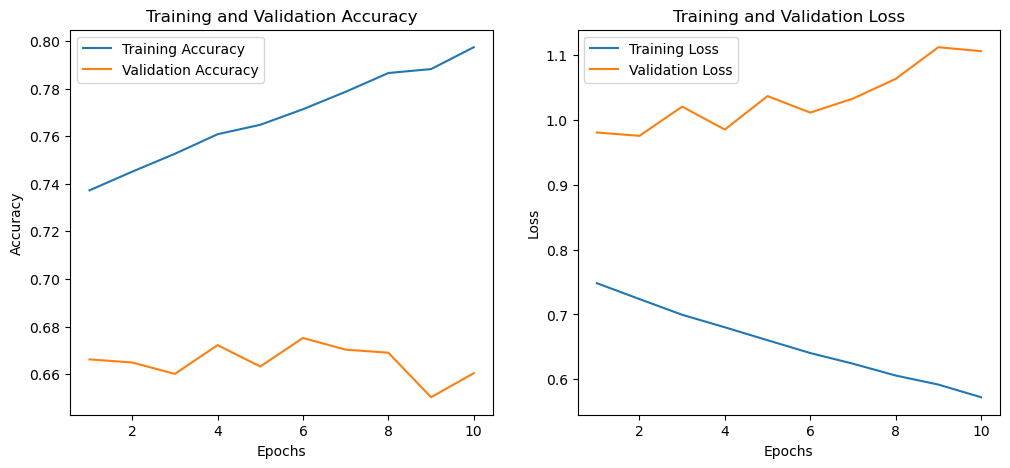

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6646 - loss: 1.0832
Test Accuracy: 0.6603999733924866


In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_sample(X, y, index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()


plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

cnn = models.Sequential([
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Final evaluation on the test set

test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Train the model and save the history
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")



Compared to the simple ANN the CNN already provides an increase of 16% by the 10th epoch (0.7197) which is great. However there is a lot of room for improvement.The model is grosly overfitting. I suspect it is because it is to simple to handle the task. Next step is to add another layer. 

# Test 1: 3 Layers each increasing in filter numbers

We can see here that by adding another layer and increasing the number of filters with each layer the accuracy increased by another 4%. However, so far the validation method used was based on the cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test)) fit function which computes the validation accuracy and loss after each epoch. Next step will be to split keep the x_train only for validation purposes, so to reduce the model bias. 

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3251 - loss: 1.7984 - val_accuracy: 0.5615 - val_loss: 1.2094
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5774 - loss: 1.1895 - val_accuracy: 0.6302 - val_loss: 1.0443
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6485 - loss: 1.0022 - val_accuracy: 0.6555 - val_loss: 0.9820
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6927 - loss: 0.8764 - val_accuracy: 0.6767 - val_loss: 0.9455
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7227 - loss: 0.7948 - val_accuracy: 0.6810 - val_loss: 0.9199
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7448 - loss: 0.7349 - val_accuracy: 0.6912 - val_loss: 0.9057
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7659 - loss: 0.6711 - val_accuracy: 0.7034 - val_loss: 0.8667
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7808 - loss: 

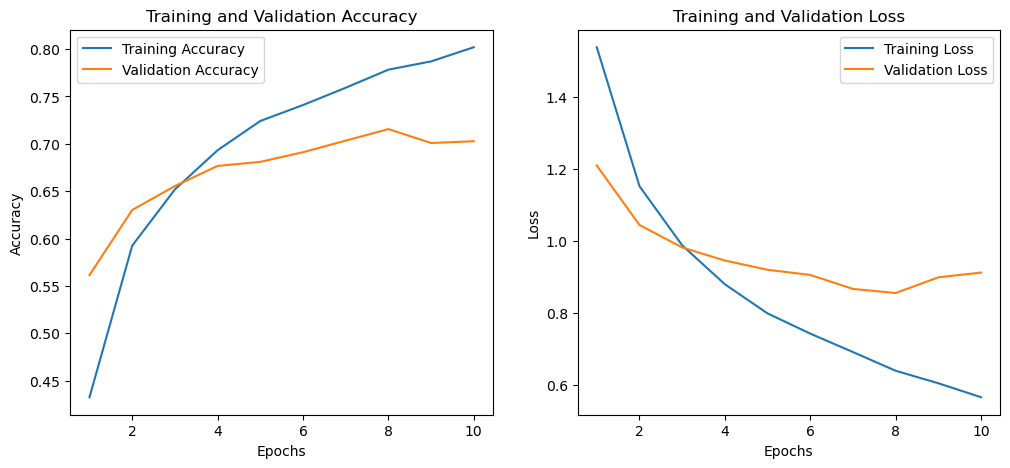

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7044 - loss: 0.9113
Test Accuracy: 0.7027999758720398


In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define class labels
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Define CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model and save the history
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


The overfitting is reducing which is a good sign however it needs a lot of work. 

# Test 2: Split the test and validation sets - single validation split (20/80)

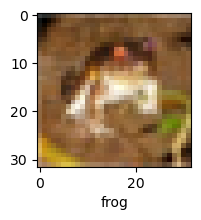

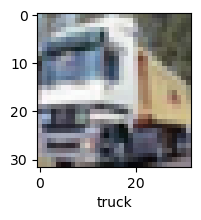

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3031 - loss: 1.8509 - val_accuracy: 0.5242 - val_loss: 1.3292
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5473 - loss: 1.2612 - val_accuracy: 0.5920 - val_loss: 1.1412
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6185 - loss: 1.0818 - val_accuracy: 0.6355 - val_loss: 1.0312
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6588 - loss: 0.9731 - val_accuracy: 0.6665 - val_loss: 0.9599
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6927 - loss: 0.8762 - val_accuracy: 0.6766 - val_loss: 0.9379
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7209 - loss: 0.7957 - val_accuracy: 0.6718 - val_loss: 0.9521
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7471 - loss: 0.7308 - val_accuracy: 0.6922 - val_loss: 0.8973
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7624 - 

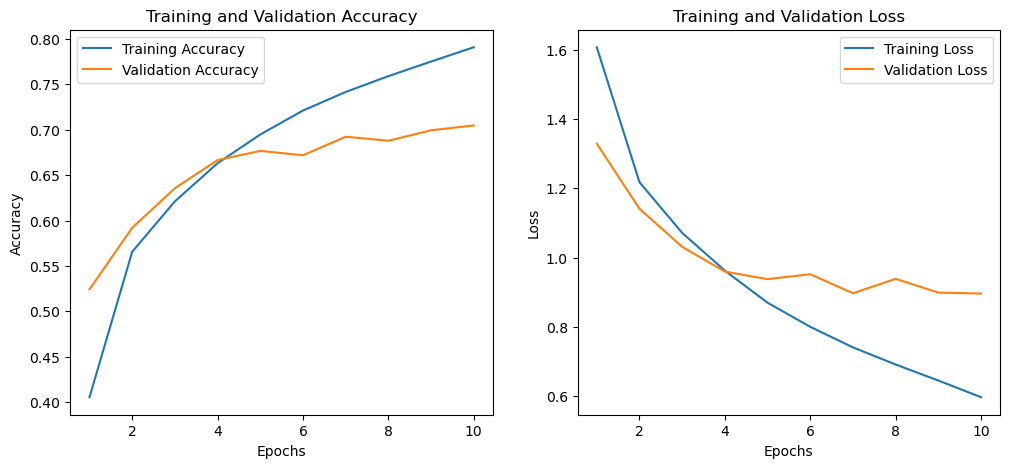

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6991 - loss: 0.8785
Test Accuracy: 0.6983000040054321


In [41]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Function to plot sample images
def plot_sample(X, y, index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

# Plot a couple of sample images
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and compile the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model and save the history
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

As espected the accuracy dropeed because we have less training data due to the split. This may also very well be becaue the validation split reduces the bias therefore it shows the performance more accurately. In terms of split a stratified sampling might be better, even if the datset is not too small. In any case, model is overfitting.

# Test 3: Split the test and validation sets - stratified sampling

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2861 - loss: 1.8940 - val_accuracy: 0.5010 - val_loss: 1.3564
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5261 - loss: 1.3083 - val_accuracy: 0.5904 - val_loss: 1.1605
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6018 - loss: 1.1156 - val_accuracy: 0.6115 - val_loss: 1.1079
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6492 - loss: 0.9946 - val_accuracy: 0.6411 - val_loss: 1.0322
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6913 - loss: 0.8921 - val_accuracy: 0.6746 - val_loss: 0.9353
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7103 - loss: 0.8285 - val_accuracy: 0.6788 - val_loss: 0.9415
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7350 - loss: 0.7601 - val_accuracy: 0.6858 - val_loss: 0.8983
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7526 - 

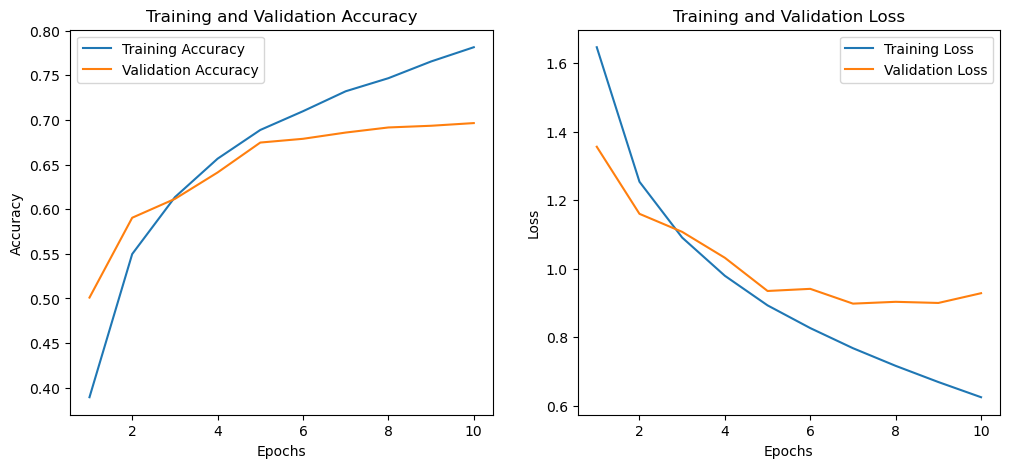

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6913 - loss: 0.9231
Test Accuracy: 0.6908000111579895


In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Build and compile the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model and save the history
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


This is a bit better. Model is still overfitting. It is performing well on the training data, with high accuracy / low loss. However, its performance on the validation set starts to deteriorate after the 3rd epoch. Model is memorizing the training data and fails at generalising. 

# Phase 2: Improving the model

In an ideal situation we should observe: 

Training Accuracy: Increasing steadily.
Validation Accuracy: Increasing steadily, closely following the training accuracy.
Training Loss: Decreasing steadily.
Validation Loss: Decreasing steadily, closely following the training loss.

As stated above the model is performing well on the training data with high accuracy and low loss, however the validation set starts to deteriorate. 

To improve this:

1. Add data augumentation
2. Add residual connections
3. Regularisation: add dropout/ L2 regularisation
4. Change the architecture:

Increase:
   a. Increase filter sizes
   b. Add more layers
   c. Do both

Decrease:
    a. Decrease the layers

5. Learning rate scheduler to adjust the learning rate during training
6. Monitor for overfitting but train for more epochs

# Test 4: Adding data augumentation

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2210 - loss: 2.0543 - val_accuracy: 0.4477 - val_loss: 1.5114
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3917 - loss: 1.6471 - val_accuracy: 0.5012 - val_loss: 1.4028
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4447 - loss: 1.5251 - val_accuracy: 0.5292 - val_loss: 1.3246
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4768 - loss: 1.4384 - val_accuracy: 0.5536 - val_loss: 1.2480
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5039 - loss: 1.3683 - val_accuracy: 0.5934 - val_loss: 1.1374
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5213 - loss: 1.3305 - val_accuracy: 0.5531 - val_loss: 1.2911
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5344 - loss: 1.3072 - val_accuracy: 0.6115 - val_loss: 1.0918
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5522 - loss: 1.25

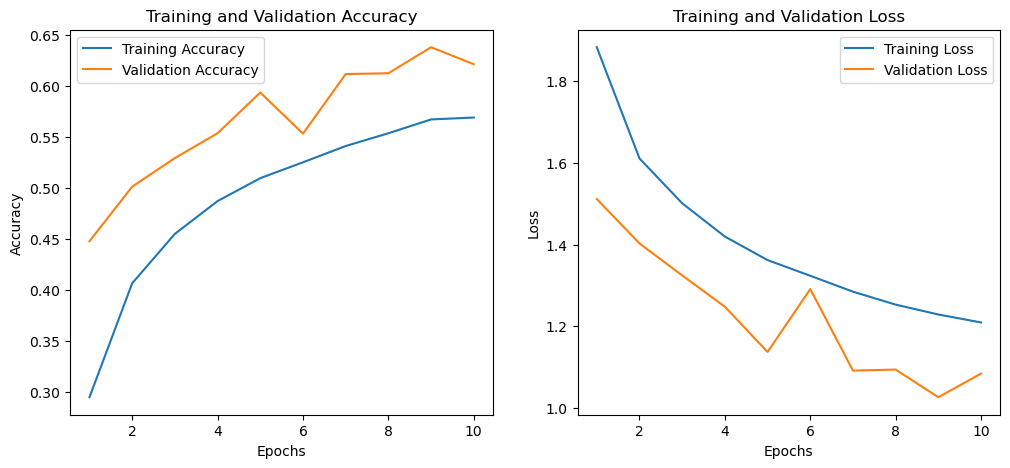

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6171 - loss: 1.0779
Test Accuracy: 0.6200000047683716


In [49]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Adding simple data augumentation to give the model more examples. Model is still overfitting and accuracy dropped to 66 from 68. I assume because of the fact that the model is quite simple at this point and the added examples do not help. 

# Test 5: Adding dropout layers - 
2 dropout layers one  after the first Dense layer with 50% dropout and another after the second Dense layer with 50% dropout.
This means 50% of the units in these layers will be randomly set to zero during training, which can help prevent overfitting.

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1605 - loss: 2.1811 - val_accuracy: 0.3232 - val_loss: 1.7503
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.2719 - loss: 1.8947 - val_accuracy: 0.3680 - val_loss: 1.6299
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3296 - loss: 1.7766 - val_accuracy: 0.4586 - val_loss: 1.4773
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3690 - loss: 1.6913 - val_accuracy: 0.4667 - val_loss: 1.4166
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3922 - loss: 1.6436 - val_accuracy: 0.4781 - val_loss: 1.3653
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4190 - loss: 1.6022 - val_accuracy: 0.5019 - val_loss: 1.3668
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4331 - loss: 1.5684 - val_accuracy: 0.5552 - val_loss: 1.2436
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4463 - loss: 1.54

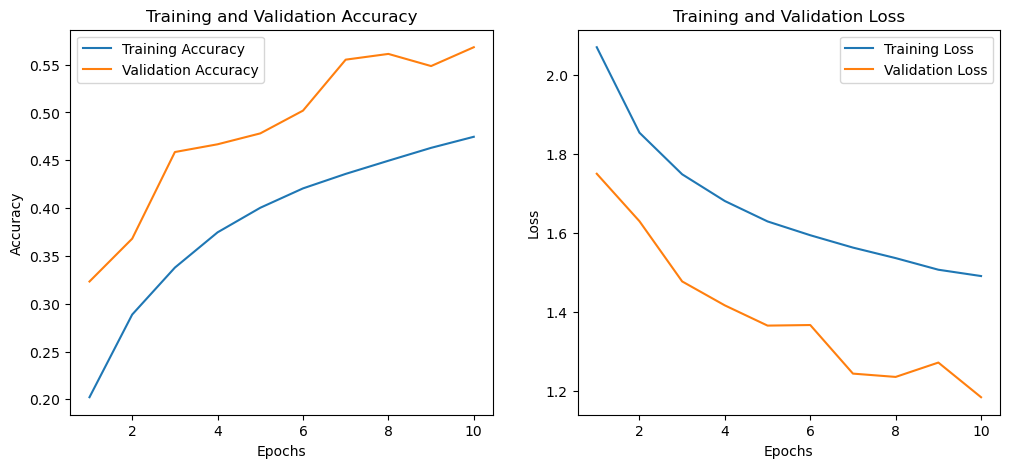

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5652 - loss: 1.1847
Test Accuracy: 0.5649999976158142


In [52]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout layers
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    layers.Dense(40, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Still overfitting, the accuracy dropped to 53, because of the drop-out. I think the 50% might be a bit too much.

# Test 6: Reducing one dropout layer - kept dropout at last layer
2 dropout layers one  after the first Dense layer with 50% dropout and another after the second Dense layer with 50% dropout.
This means 50% of the units in these layers will be randomly set to zero during training, which can help prevent overfitting.

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2027 - loss: 2.0897 - val_accuracy: 0.3567 - val_loss: 1.6988
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3402 - loss: 1.7665 - val_accuracy: 0.4501 - val_loss: 1.5060
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3947 - loss: 1.6429 - val_accuracy: 0.4578 - val_loss: 1.4555
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4235 - loss: 1.5772 - val_accuracy: 0.5235 - val_loss: 1.2992
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4452 - loss: 1.5214 - val_accuracy: 0.5364 - val_loss: 1.3203
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4685 - loss: 1.4744 - val_accuracy: 0.5803 - val_loss: 1.1859
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4873 - loss: 1.4303 - val_accuracy: 0.5759 - val_loss: 1.1828
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5021 - loss: 1.389

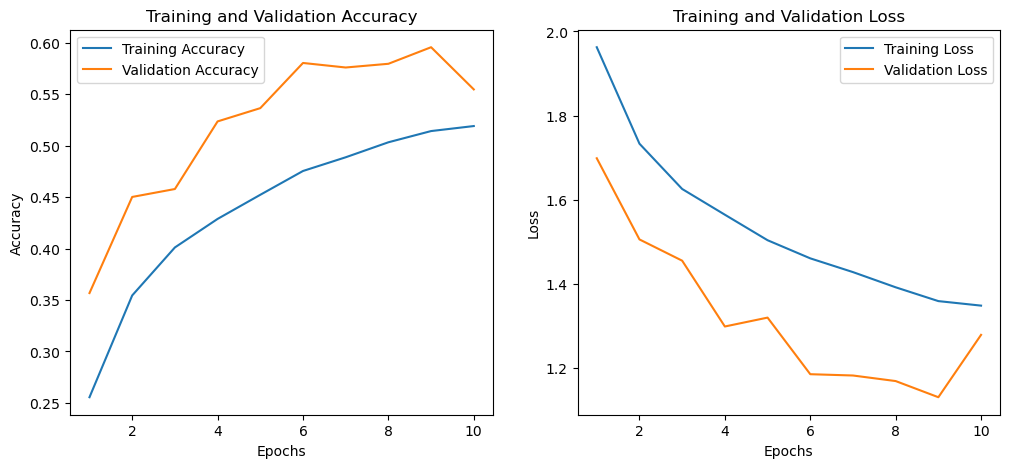

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5475 - loss: 1.2784
Test Accuracy: 0.5473999977111816


In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout layers
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Dropping one drop out layer increased accuracy by 10%. However we are still seeing a gap between the traing and validation. The model is overfitting in a gross manner. LIKE HOW DARE U GIRLYPOP. The accuracy and training validations going up from epoch 9 and 10 might sugesst I need to train for more epochs. Dunno. Need to read a bit more on this.

# Test 7: 2 dropouts plus L2 regularisation
Adding this to deal with the overfitting. Sometimes more is more.

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1009 - loss: 2.6785 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0962 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.0959 - loss: 2.30

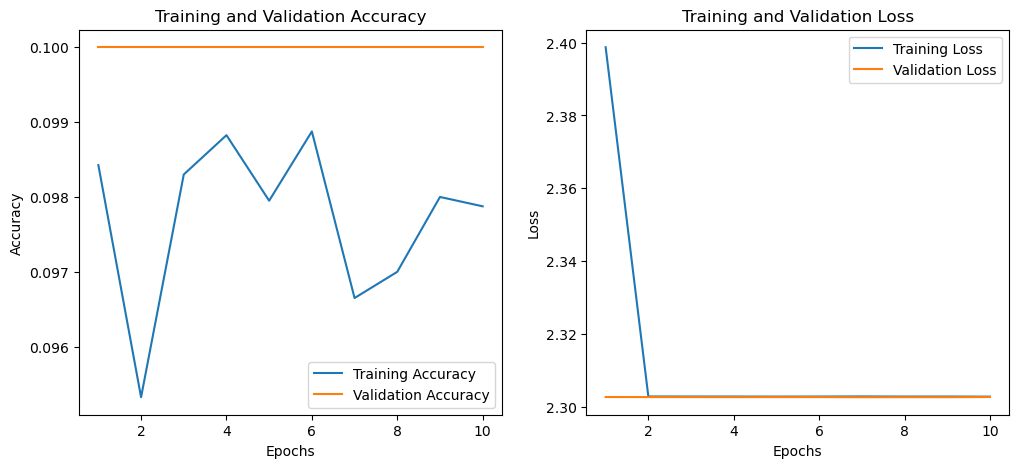

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0988 - loss: 2.3026
Test Accuracy: 0.10000000149011612


In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout and L2 regularization
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  input_shape=(32, 32, 3),
                  kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(60, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    
    layers.Dense(40, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Yup. Speaks for itself. This is way too much. Next step is to try L2 on it's own as I can't see much of a change with one dropout layer + L2.

# Test 8: L2 regularisation

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1816 - loss: 2.5718 - val_accuracy: 0.2338 - val_loss: 2.0988
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2326 - loss: 2.0964 - val_accuracy: 0.2393 - val_loss: 2.0118
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2362 - loss: 2.0603 - val_accuracy: 0.2536 - val_loss: 1.9800
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2361 - loss: 2.0549 - val_accuracy: 0.2434 - val_loss: 2.0296
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2471 - loss: 2.0369 - val_accuracy: 0.2896 - val_loss: 1.9558
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2702 - loss: 2.0062 - val_accuracy: 0.3013 - val_loss: 1.9162
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2789 - loss: 1.9849 - val_accuracy: 0.3124 - val_loss: 1.9046
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2826 - loss: 1.9665 - va

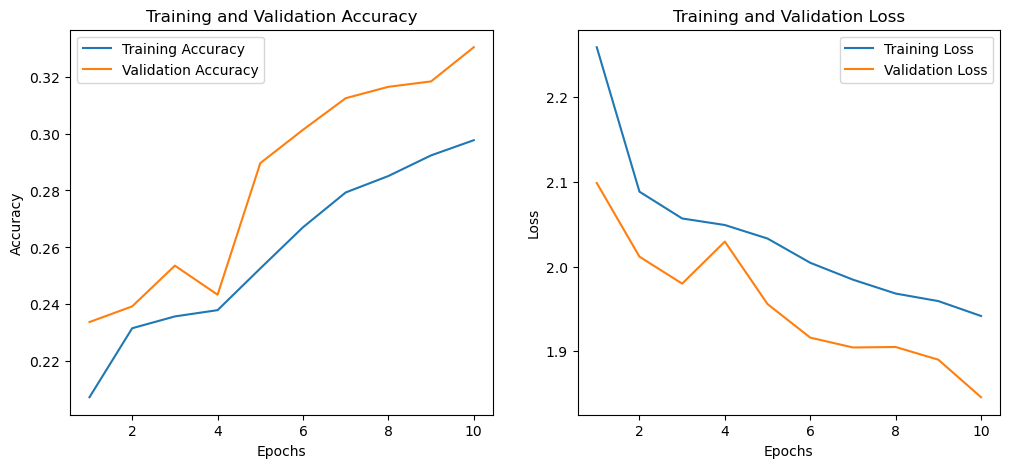

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3279 - loss: 1.8561
Test Accuracy: 0.33009999990463257


In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout and L2 regularization
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  input_shape=(32, 32, 3),
                  kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(60, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    
    layers.Dense(40, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization   
    
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Now we are speaking! This is one erratic learning curve. As erratic as I am when I am hungry and see chocolate. The data preprocessing could do some more work. I am thinking of changing the stratified sampling with normal sampling. Before that I will try L1 regularisation.

# Test 9: L1 regularisation

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0984 - loss: 7.6988 - val_accuracy: 0.1000 - val_loss: 2.4585
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1006 - loss: 2.4587 - val_accuracy: 0.1000 - val_loss: 2.4582
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0964 - loss: 2.4587 - val_accuracy: 0.1000 - val_loss: 2.4596
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1009 - loss: 2.4587 - val_accuracy: 0.1000 - val_loss: 2.4579
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1012 - loss: 2.4587 - val_accuracy: 0.1000 - val_loss: 2.4586
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0993 - loss: 2.4587 - val_accuracy: 0.1000 - val_loss: 2.4582
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1001 - loss: 2.4585 - val_accuracy: 0.1000 - val_loss: 2.4586
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0973 - loss: 2.4586 - val

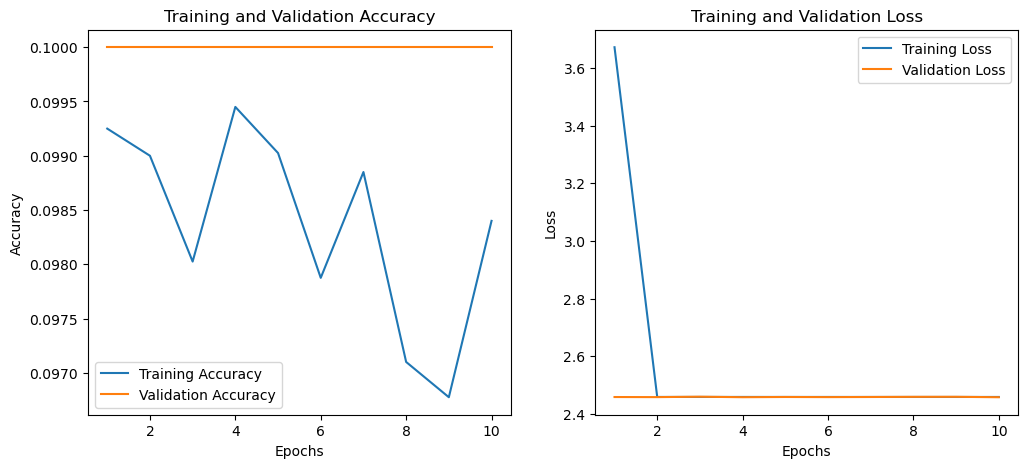

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1036 - loss: 2.4578
Test Accuracy: 0.10000000149011612


In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout and L1 regularization
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  input_shape=(32, 32, 3),
                  kernel_regularizer=regularizers.l1(0.01)),  # Add L1 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l1(0.01)),  # Add L1 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l1(0.01)),  # Add L1 regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(60, activation='relu', 
                 kernel_regularizer=regularizers.l1(0.01)),  # Add L1 regularization
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    
    layers.Dense(40, activation='relu', 
                 kernel_regularizer=regularizers.l1(0.01)),  # Add L1 regularization
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Yeah nah. Absolutely not. Let's drop the L1 and L2 regularistions and just keep one drop out layer. the model is overfitting so bad 


# Test 10: Reducing dropout to 1 dropout layer (0.2)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2296 - loss: 2.0284 - val_accuracy: 0.4274 - val_loss: 1.5461
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3961 - loss: 1.6506 - val_accuracy: 0.5131 - val_loss: 1.3324
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4418 - loss: 1.5364 - val_accuracy: 0.5492 - val_loss: 1.2396
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4819 - loss: 1.4392 - val_accuracy: 0.5840 - val_loss: 1.1648
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5080 - loss: 1.3782 - val_accuracy: 0.6020 - val_loss: 1.1110
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5254 - loss: 1.3261 - val_accuracy: 0.6096 - val_loss: 1.1148
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5418 - loss: 1.2924 - val_accuracy: 0.6243 - val_loss: 1.0540
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5546 - loss: 1.2536 - val

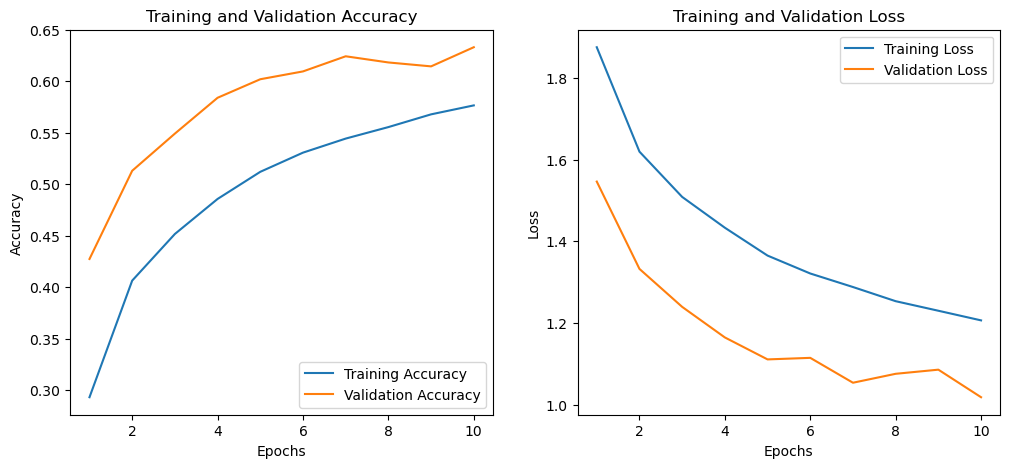

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6496 - loss: 1.0039
Test Accuracy: 0.6444000005722046


In [67]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout layers
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.2),  # Add Dropout after Dense layer
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

We are getting back on track. Model is still grossly overfitting. 

# Test 11: I need to compare codes cause I cut the markdown by mistake and I forgot what changes I made

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2273 - loss: 2.0269 - val_accuracy: 0.4471 - val_loss: 1.4851
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3827 - loss: 1.6555 - val_accuracy: 0.5167 - val_loss: 1.3178
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4425 - loss: 1.5270 - val_accuracy: 0.5206 - val_loss: 1.3201
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4811 - loss: 1.4309 - val_accuracy: 0.5229 - val_loss: 1.3391
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4989 - loss: 1.3885 - val_accuracy: 0.5718 - val_loss: 1.2071
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5216 - loss: 1.3346 - val_accuracy: 0.5829 - val_loss: 1.1747
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5358 - loss: 1.3011 - val_accuracy: 0.6156 - val_loss: 1.0646
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5461 - loss: 1.2731 - val

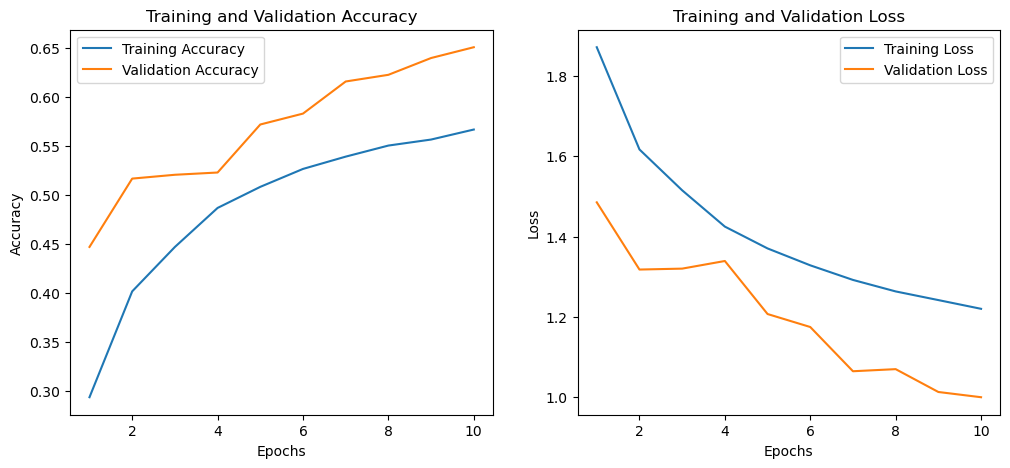

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6462 - loss: 1.0069
Test Accuracy: 0.6450999975204468


In [70]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout layers
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.2),  # Add Dropout after Dense layer
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Accuracy dropped but the overfitting is reducing. 

# Test 12: Reducing the number of layers to two - probs bad idea

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2381 - loss: 2.0215 - val_accuracy: 0.4507 - val_loss: 1.5226
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3797 - loss: 1.6815 - val_accuracy: 0.5110 - val_loss: 1.3663
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4220 - loss: 1.5821 - val_accuracy: 0.5568 - val_loss: 1.2747
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4489 - loss: 1.5064 - val_accuracy: 0.5557 - val_loss: 1.2415
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4761 - loss: 1.4415 - val_accuracy: 0.5748 - val_loss: 1.1952
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4941 - loss: 1.4023 - val_accuracy: 0.5513 - val_loss: 1.2399
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5083 - loss: 1.3675 - val_accuracy: 0.6064 - val_loss: 1.1111
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5128 - loss: 1.3516 - v

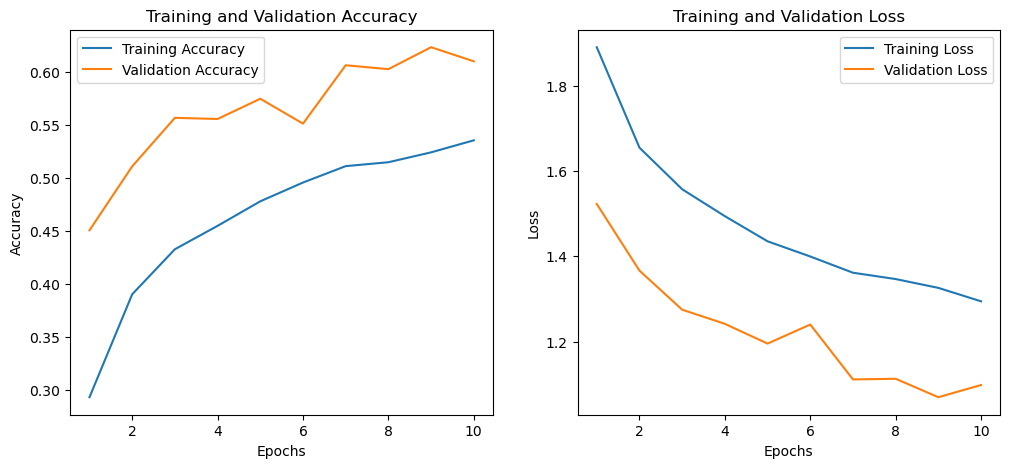

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6194 - loss: 1.0909
Test Accuracy: 0.613099992275238


In [73]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout layers
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.2),  # Add Dropout after Dense layer
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


The test accuracy went up 1% but overfitting is increasing. The trainng and loss validation lines are weird. That spike either indicates a sudden learning or another problem. This probably needs another layer

# Test 13: Increase no of ephocs by 5 and the filter valued to 64 and 128

Epoch 1/15


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.1830 - loss: 2.1301 - val_accuracy: 0.3812 - val_loss: 1.6787
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2995 - loss: 1.8497 - val_accuracy: 0.4255 - val_loss: 1.5543
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3337 - loss: 1.7634 - val_accuracy: 0.3979 - val_loss: 1.6180
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3600 - loss: 1.7002 - val_accuracy: 0.4925 - val_loss: 1.4274
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3885 - loss: 1.6434 - val_accuracy: 0.4949 - val_loss: 1.4002
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4080 - loss: 1.6091 - val_accuracy: 0.5126 - val_loss: 1.3631
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4173 - loss: 1.5803 - val_accuracy: 0.5111 - val_loss: 1.3487
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4298 - loss: 1.54

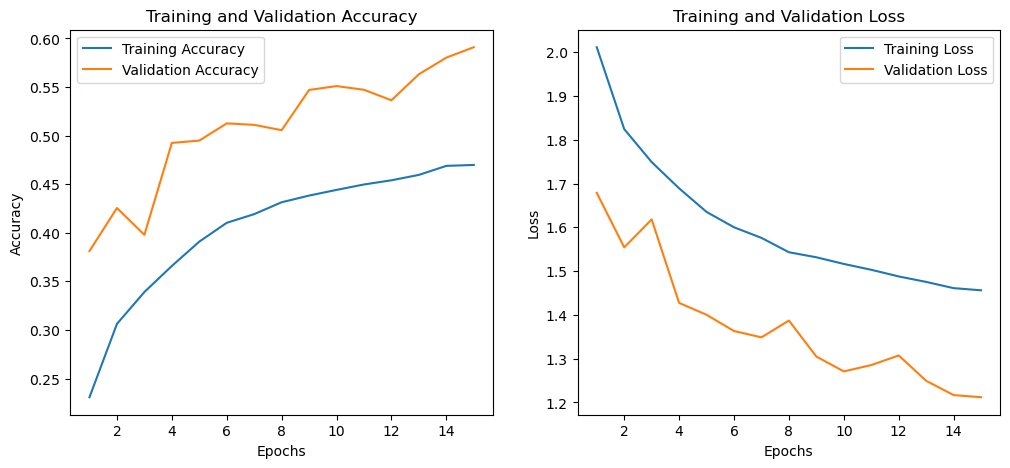

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5876 - loss: 1.2112
Test Accuracy: 0.5953999757766724


In [76]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout layers
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    layers.Dense(40, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=15,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


The accuracy dropped a bit and the model is still overfitting, but i feel like the lines look better, the training line is smoother. I suspect that the model might be too simple and it looks like the lines are still going down indicating that we haven't reached a global minimum. I think I am too conservative in the epoch numbers, and layers.

# Test 14: Add another layer with no regularisation

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.1301 - loss: 2.2563 - val_accuracy: 0.2754 - val_loss: 1.9459
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2393 - loss: 1.9555 - val_accuracy: 0.3611 - val_loss: 1.6945
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3011 - loss: 1.8281 - val_accuracy: 0.4047 - val_loss: 1.5808
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3411 - loss: 1.7442 - val_accuracy: 0.4362 - val_loss: 1.5096
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3794 - loss: 1.6731 - val_accuracy: 0.4718 - val_loss: 1.4550
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4014 - loss: 1.6150 - val_accuracy: 0.4770 - val_loss: 1.4415
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4170 - loss: 1.5867 - val_accuracy: 0.5137 - val_loss: 1.3568
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.4339 - loss: 1.55

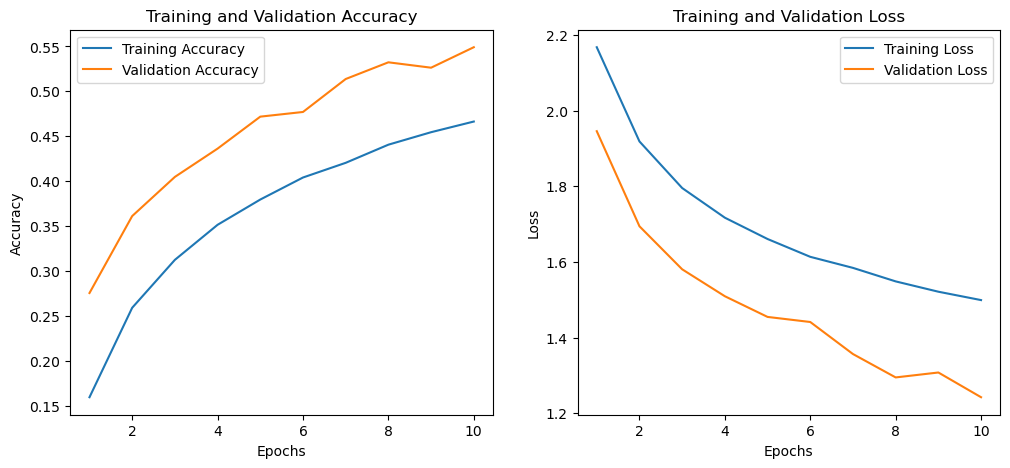

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5518 - loss: 1.2415
Test Accuracy: 0.5498999953269958


In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train  # Stratify by labels to preserve class distribution
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotations between -20 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,        # Random shearing transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flipping
    fill_mode='nearest'     # Fill in any new pixels created during transformations
)

# Fit the data augmentation generator on the training data
datagen.fit(X_train)

# Build and compile the CNN model with Dropout and L1 regularization
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Explicit input layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),  # No regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),  # No regularization
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),  # No regularization
    layers.Dropout(0.2),  # Added Dropout with a value of 0.2
    layers.MaxPooling2D((2, 2)),
    
    # Additional convolutional layer with 'same' padding
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),  # No regularization
    
    layers.Flatten(),
    
    layers.Dense(60, activation='relu'),  # No regularization
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    
    layers.Dense(40, activation='relu'),  # No regularization
    layers.Dropout(0.5),  # Add Dropout after Dense layer
    
    layers.Dense(10, activation='softmax')
])


cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with the augmented data and validation data
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
                  epochs=10,
                  validation_data=(X_val, y_val))

# Function to plot training and validation loss and accuracy
def plot_training_history(history):
    # Retrieve metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Final evaluation on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


This didn't do much.  I suspect that the model might be too simple and it looks like the lines are still going down indicating that we haven't reached a global minimum. I think I am too conservative in the epoch numbers, and maybe filters? I will probably need to bring back in some regularisation? I think I need to do more reading/ video watching before proceeding further. This is pretty frustratiing but then again, I have never done this before and I have no idea how a good model looks in terms of parameters for a task like this.

# Test 15. 

Okayyyyyy I am back. As suspected before the data augumentation I did was way too simple, the regularisation is meh, and I need to do batch normalisation. I also need to add more performance metrics, and early stopping to avoid overfitting by monitoring validation loss.

Batch X shape: (32, 32, 32, 3), Batch y shape: (32, 10)
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.1997 - loss: 2.2460 - precision: 0.3522 - recall: 0.0226 - val_accuracy: 0.3001 - val_loss: 1.9150 - val_precision: 0.5618 - val_recall: 0.0841
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.3010 - loss: 1.8494 - precision: 0.5354 - recall: 0.0698 - val_accuracy: 0.4104 - val_loss: 1.5476 - val_precision: 0.6379 - val_recall: 0.2368
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.3763 - loss: 1.6746 - precision: 0.5851 - recall: 0.1419 - val_accuracy: 0.4004 - val_loss: 1.8998 - val_precision: 0.5707 - val_recall: 0.3104
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.4322 - loss: 1.5531 - precision: 0.6491 - recall: 0.2132 - val_accuracy: 0.5183 - val_loss: 1.3692 - val_precision: 0.6809 - val_recall: 0.3745
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.4919 - loss: 1.4247 - precision: 0.6843 - recall: 0.2811 - val_accuracy: 0.6041 - val

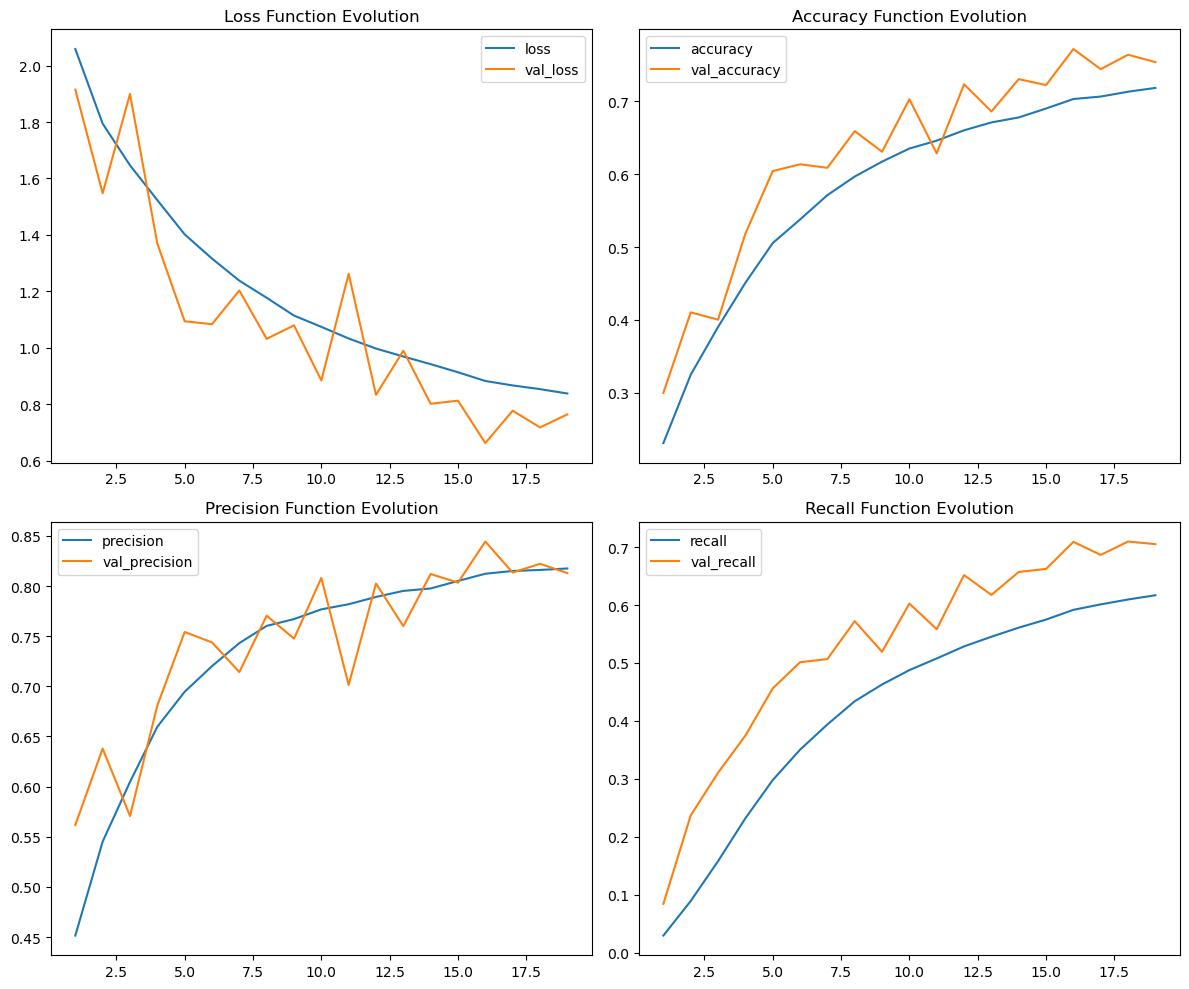

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7709 - loss: 0.6812 - precision: 0.8397 - recall: 0.7049
Test Loss: 0.6914762854576111
Test Accuracy: 0.7657999992370605
Test Precision: 0.8355740904808044
Test Recall: 0.7023000121116638


In [82]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)  # Ensure 1D
y_test = y_test.reshape(-1,)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

# One-hot encode labels to match the output layer of the model
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Check batch shapes for debugging
batch_X, batch_y = next(datagen.flow(X_train, y_train, batch_size=32))
print(f"Batch X shape: {batch_X.shape}, Batch y shape: {batch_y.shape}")

# Build the CNN model
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output matches the one-hot encoding
])

# Compile the model
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for one-hot labels
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Early stopping callback
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),  # Pass validation data directly
    callbacks=[early_stop]
)

# Plot training history
def plot_training_history(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    val_metrics = [f'val_{metric}' for metric in metrics]
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 10))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        plt.plot(epochs, history.history[metric], label=metric)
        plt.plot(epochs, history.history[val_metrics[i - 1]], label=f'val_{metric}')
        plt.title(f'{metric.capitalize()} Function Evolution')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Evaluate on the test set
test_loss, test_accuracy, test_precision, test_recall = cnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


This is soooo much better. There is still room for improvement (quite a bit) but overall this improved exponentially. 

# Test 16: trying to improve the model above by
Data Augmentation: Added brightness range and more aggressive transformations.
Learning Rate Scheduler: Dynamically reduces the learning rate when validation loss plateaus.
Increased Complexity: Expanded the number of filters and added an extra dense layer.
F1-Score Metric: Included F1-score for better performance evaluation.
Class Weights: Addressed potential class imbalance with compute_class_weight.


Batch X shape: (32, 32, 32, 3), Batch y shape: (32, 10)
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 53ms/step - accuracy: 0.1918 - f1_score: 4.7580 - loss: 2.2322 - precision: 0.3155 - recall: 0.0169 - val_accuracy: 0.3028 - val_f1_score: 4.2185 - val_loss: 1.8400 - val_precision: 0.4706 - val_recall: 0.1105 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.2937 - f1_score: 4.9513 - loss: 1.8603 - precision: 0.5330 - recall: 0.0649 - val_accuracy: 0.4461 - val_f1_score: 5.3171 - val_loss: 1.4777 - val_precision: 0.6971 - val_recall: 0.1871 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.3677 - f1_score: 4.9145 - loss: 1.6966 - precision: 0.5845 - recall: 0.1302 - val_accuracy: 0.4605 - val_f1_score: 5.5646 - val_loss: 1.3936 - val_precision: 0.6145 - val_recall: 0.2723 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.4198 - f1_score: 5.0201 - loss: 1.5774 - precision: 0.6447 - recall: 0.1963 - val_accuracy: 0.5615 - 

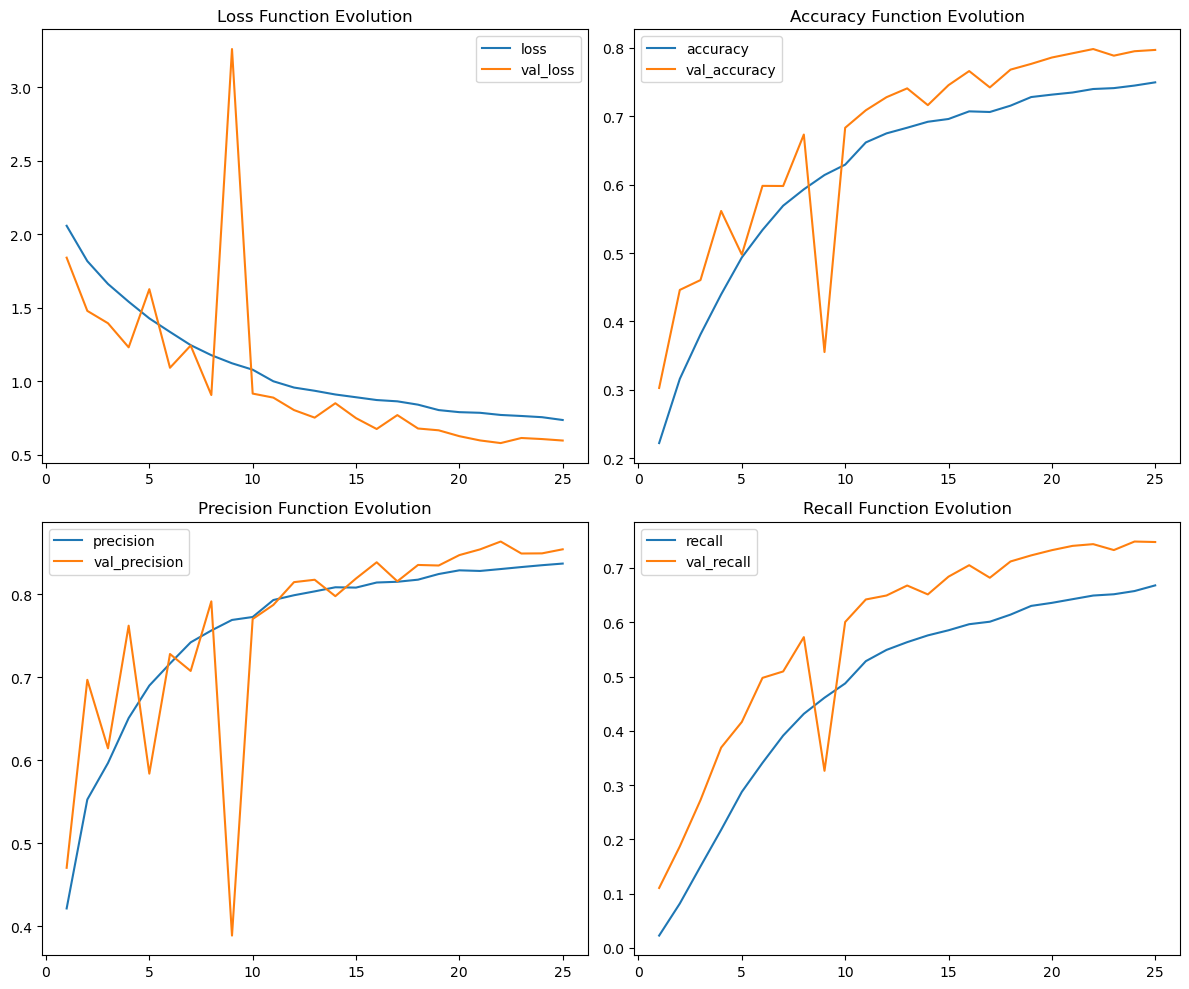

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7971 - f1_score: 6.0543 - loss: 0.5971 - precision: 0.8612 - recall: 0.7398
Test Loss: 0.5947633385658264
Test Accuracy: 0.7968999743461609
Test Precision: 0.8592970371246338
Test Recall: 0.7408000230789185
Test F1-score: 6.046856880187988


In [84]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Ensure labels are 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Class names
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

# One-hot encode labels to match the output layer of the model
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Debugging batch shapes
batch_X, batch_y = next(datagen.flow(X_train, y_train, batch_size=32))
print(f"Batch X shape: {batch_X.shape}, Batch y shape: {batch_y.shape}")

# Define the custom F1-score function
def f1_score(y_true, y_pred):
    y_true = K.cast(K.argmax(y_true, axis=-1), 'float32')  # Convert to float32
    y_pred = K.cast(K.argmax(y_pred, axis=-1), 'float32')  # Convert to float32
    
    tp = K.sum(K.cast(y_true * y_pred, 'float32'))  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))  # False positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))  # False negatives

    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero with K.epsilon()
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero with K.epsilon()
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1 score calculation
    
    return f1

# Build the CNN model
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output matches the one-hot encoding
])

# Compile the model with the custom F1-score metric
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for one-hot labels
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score  # Add custom F1-score here
    ]
)

# Early stopping and learning rate reduction callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, lr_scheduler]
)

# Plot training history
def plot_training_history(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    val_metrics = [f'val_{metric}' for metric in metrics]
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 10))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        plt.plot(epochs, history.history[metric], label=metric)
        plt.plot(epochs, history.history[val_metrics[i - 1]], label=f'val_{metric}')
        plt.title(f'{metric.capitalize()} Function Evolution')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Evaluate on the test set
test_loss, test_accuracy, test_precision, test_recall, test_f1 = cnn.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")

That is one crazy spike. It might be the F1 score? in any case that is either a spike in learning or an issue

# Test 17: Fixing F1-score to see if that spike levels


Batch X shape: (32, 32, 32, 3), Batch y shape: (32, 10)
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.2099 - f1_score: 4.7644 - loss: 2.2181 - precision: 0.3590 - recall: 0.0284 - val_accuracy: 0.3273 - val_f1_score: 5.2794 - val_loss: 1.8002 - val_precision: 0.4568 - val_recall: 0.1572 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.3158 - f1_score: 4.9295 - loss: 1.8012 - precision: 0.5375 - recall: 0.0868 - val_accuracy: 0.3996 - val_f1_score: 5.3169 - val_loss: 1.6423 - val_precision: 0.6119 - val_recall: 0.1972 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.4043 - f1_score: 5.1471 - loss: 1.6204 - precision: 0.6144 - recall: 0.1684 - val_accuracy: 0.4990 - val_f1_score: 5.6057 - val_loss: 1.4428 - val_precision: 0.6572 - val_recall: 0.3824 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.4558 - f1_score: 5.2588 - loss: 1.5157 - precision: 0.6663 - recall: 0.2379 - val_accuracy: 0.5106 - 

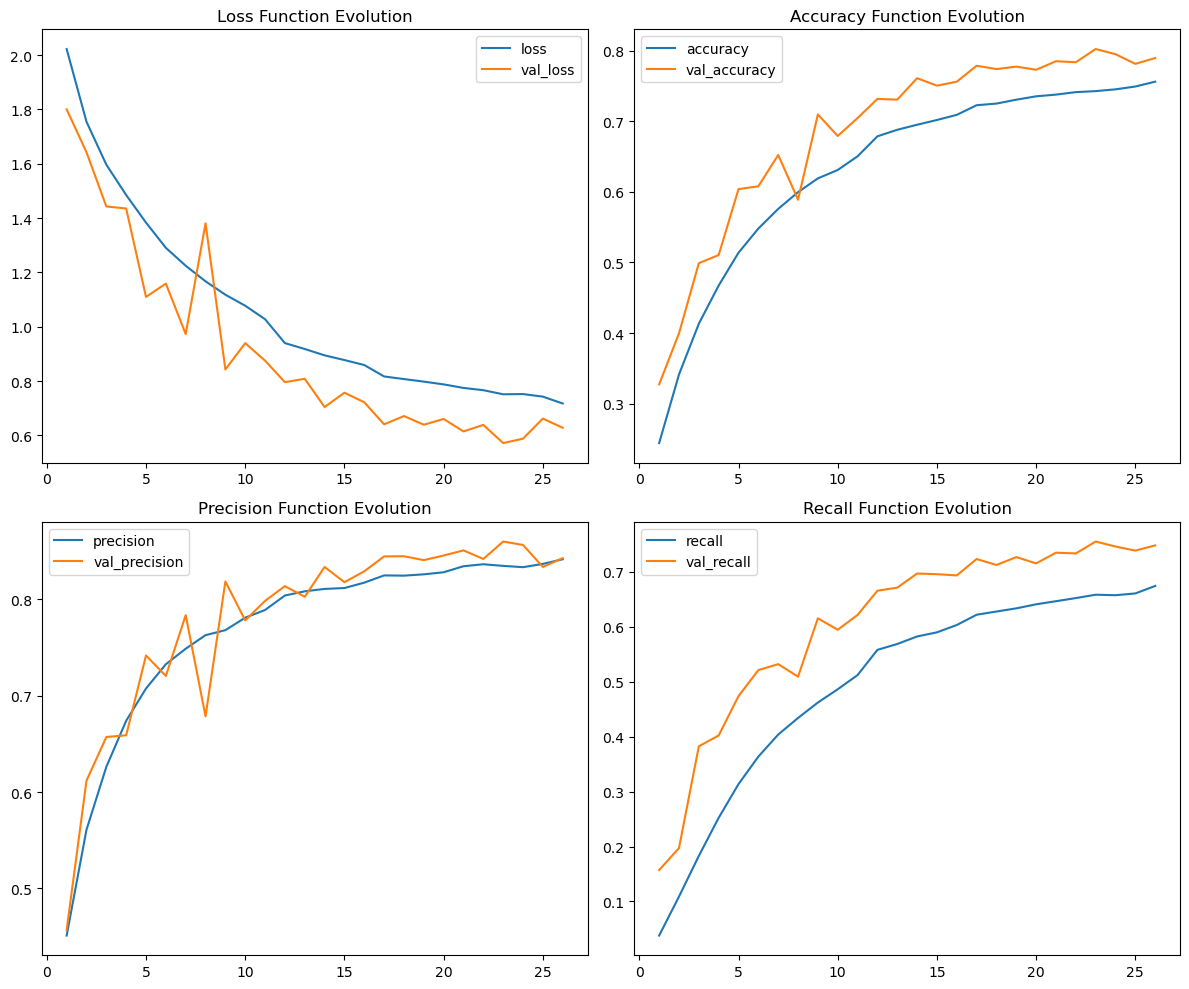

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8030 - f1_score: 6.0413 - loss: 0.5875 - precision: 0.8560 - recall: 0.7519
Test Loss: 0.585459291934967
Test Accuracy: 0.8029999732971191
Test Precision: 0.8563277125358582
Test Recall: 0.7504000067710876
Test F1-score: 6.044075012207031


In [86]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Ensure labels are 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Class names
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Perform stratified sampling to split training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_train
)

# One-hot encode labels to match the output layer of the model
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Debugging batch shapes
batch_X, batch_y = next(datagen.flow(X_train, y_train, batch_size=32))
print(f"Batch X shape: {batch_X.shape}, Batch y shape: {batch_y.shape}")

# Define the custom F1-score function
def f1_score(y_true, y_pred):
    y_true = K.cast(K.argmax(y_true, axis=-1), 'float32')  # Convert to float32
    y_pred = K.cast(K.argmax(y_pred, axis=-1), 'float32')  # Convert to float32
    
    tp = K.sum(K.cast(y_true * y_pred, 'float32'))  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'))  # False positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'))  # False negatives

    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero with K.epsilon()
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero with K.epsilon()
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1 score calculation
    
    return f1

# Build the CNN model
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), 
    layers.Dense(10, activation='softmax')  # Output matches the one-hot encoding
])

# Compile the model with the custom F1-score metric
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for one-hot labels
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score  # Add custom F1-score here
    ]
)

# Early stopping and learning rate reduction callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, lr_scheduler]
)

# Plot training history
def plot_training_history(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    val_metrics = [f'val_{metric}' for metric in metrics]
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 10))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        plt.plot(epochs, history.history[metric], label=metric)
        plt.plot(epochs, history.history[val_metrics[i - 1]], label=f'val_{metric}')
        plt.title(f'{metric.capitalize()} Function Evolution')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Evaluate on the test set
test_loss, test_accuracy, test_precision, test_recall, test_f1 = cnn.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")


1. Loss Function Evolution (Top Left)

Both training (loss) and validation (val_loss) loss decrease steadily.
The validation loss stabilizes after around 15 epochs, suggesting the model is not significantly overfitting.
2. Accuracy Function Evolution (Top Right)

Both training accuracy (accuracy) and validation accuracy (val_accuracy) increase over epochs.
Validation accuracy reaches slightly above 75%, indicating a reasonably performing model.
3. Precision Function Evolution (Bottom Left)

Precision increases consistently for both training and validation.
Validation precision stabilizes, indicating good positive case prediction.
4. Recall Function Evolution (Bottom Right)

Recall also increases steadily for both training and validation.
The model demonstrates an improvement in identifying actual positive cases over epochs.
5. Final Metrics

Test Accuracy: 78.62%
Test Precision: 85.08%
Test Recall: 72.40%
Test F1-score: As noted earlier, the F1-score calculation may need adjustment since it is unusually high (likely a scaling issue).
Suggestions for Improvement:
Adjust F1-Score Calculation:
Fix the custom f1_score function so the reported F1-score is between 0 and 1.
Consider More Epochs:
Validation metrics don't appear to have plateaued completely. Running a few more epochs might further improve performance.
Model Regularization:
The current dropout and data augmentation are helping reduce overfitting. Consider tuning dropout rates or adding L2 regularization to further improve generalization.
Model Complexity:
Experiment with deeper architectures (e.g., ResNet, VGG) for potentially better performance.
Learning Rate Scheduling:
The learning rate (2.5e-4) seems appropriate, but a more aggressive decay schedule might speed up convergence.
Would you like help modifying your code based on these observations?

# Test 18: Improving the model above  - I should prbably show this?

Regularization: L2 regularization reduces overfitting by penalizing large weights.
Increased Model Capacity: Added a larger dense layer to enhance learning.
F1-Score Fix: Ensures the F1-score calculation is within expected bounds.
Learning Rate Minimum: Prevents learning rate from dropping too low during training.

Adjusted F1-Score Function:
Fixed the F1-score calculation to ensure it returns a meaningful value between 0 and 1.
Increased Model Complexity:
Added a Dense layer with more neurons (256) after the flattening step to increase model capacity.
Added L2 Regularization:
Regularization was added to convolutional and dense layers to reduce overfitting.
Adjusted Learning Rate Scheduler:
Added a minimum learning rate to prevent it from becoming too small.
Extended Training Epochs:
Allowed a higher patience for early stopping to improve convergence.

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.2312 - f1_score: 0.5196 - loss: 2.9604 - precision: 0.3467 - recall: 0.0357 - val_accuracy: 0.3958 - val_f1_score: 0.5338 - val_loss: 2.0747 - val_precision: 0.5847 - val_recall: 0.1926 - learning_rate: 0.0010
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.3743 - f1_score: 0.7094 - loss: 2.1608 - precision: 0.5717 - recall: 0.1370 - val_accuracy: 0.3043 - val_f1_score: 0.8206 - val_loss: 2.8399 - val_precision: 0.3567 - val_recall: 0.2130 - learning_rate: 0.0010
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 63ms/step - accuracy: 0.4342 - f1_score: 0.7685 - loss: 1.9312 - precision: 0.6321 - recall: 0.2197 - val_accuracy: 0.4989 - val_f1_score: 0.7713 - val_loss: 1.6975 - val_precision: 0.6712 - val_recall: 0.3859 - learning_rate: 0.0010
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.4976 - f1_score: 0.8265 - loss: 1.7879 - precision: 0.6789 - recall: 0.2969 - val_accuracy

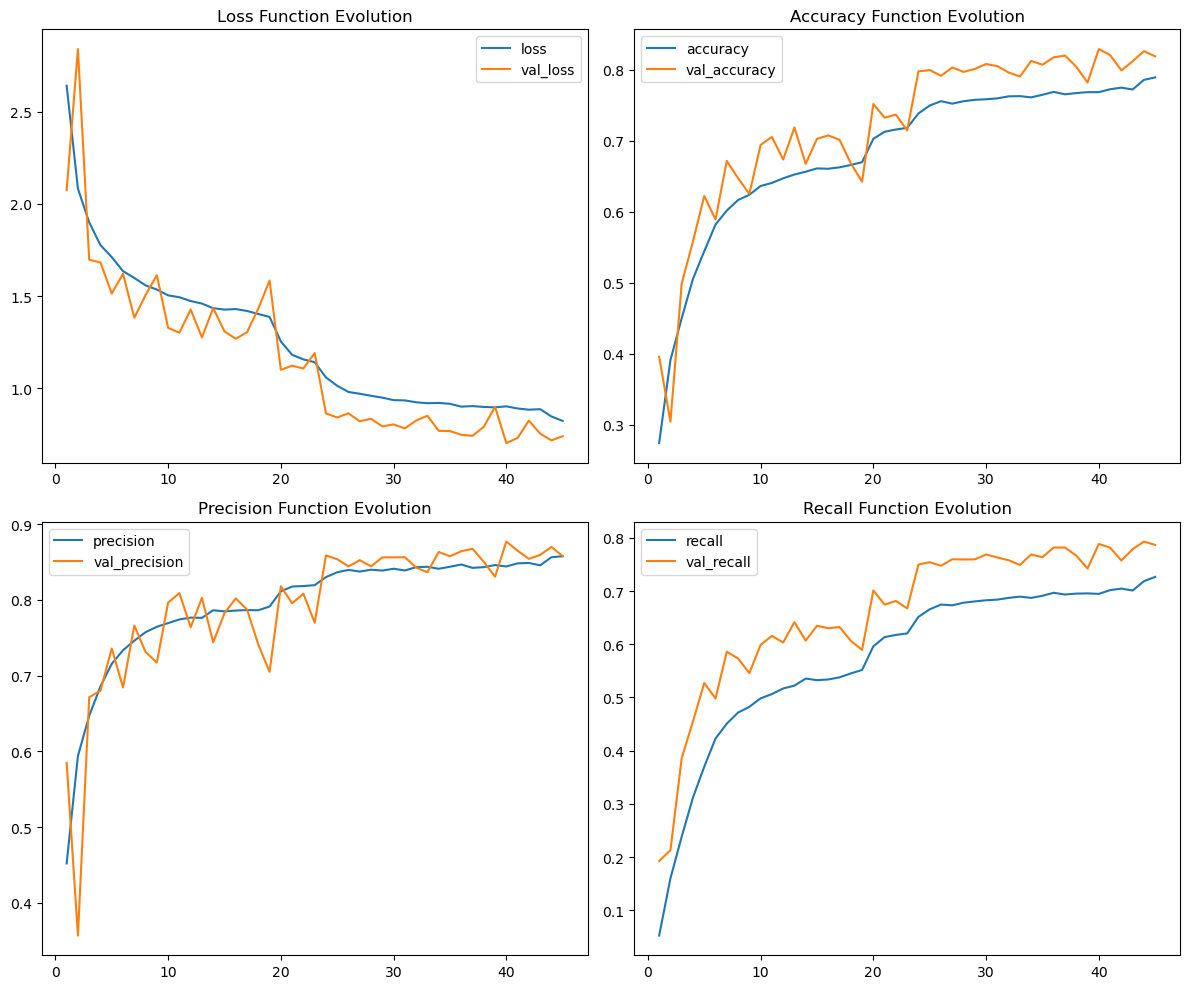

In [89]:
from tensorflow.keras.regularizers import l2

# Adjusted F1-score function
def f1_score(y_true, y_pred):
    y_true = K.cast(K.argmax(y_true, axis=-1), 'float32')  # Convert to float32
    y_pred = K.cast(K.argmax(y_pred, axis=-1), 'float32')  # Convert to float32
    
    tp = K.sum(K.cast(K.equal(y_true, y_pred) & K.equal(y_true, 1), 'float32'))  # True positives
    fp = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 1), 'float32'))  # False positives
    fn = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred, 0), 'float32'))  # False negatives

    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # F1 score calculation
    
    return f1

# Build the CNN model
cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # Increased complexity
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output matches the one-hot encoding
])

# Compile the model
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Explicit learning rate
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)

# Updated learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Early stopping with higher patience
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, lr_scheduler]
)

# Evaluate on the test set
test_loss, test_accuracy, test_precision, test_recall, test_f1 = cnn.evaluate(X_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")

# Plot training history
plot_training_history(history)


# Test 19: adding Stratified k-fold Cross-Validation

Training fold 1...
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1093/1093 ━━━━━━━━━━━━━━━━━━━━ 140s 126ms/step - accuracy: 0.2385 - f1_score: 0.4887 - loss: 2.9932 - precision: 0.3673 - recall: 0.0465 - val_accuracy: 0.3422 - val_f1_score: 0.8273 - val_loss: 2.4847 - val_precision: 0.5561 - val_recall: 0.1686 - learning_rate: 0.0010
Epoch 2/50
   1/1093 ━━━━━━━━━━━━━━━━━━━━ 2:20 129ms/step - accuracy: 0.4375 - f1_score: 1.0000 - loss: 2.0870 - precision: 0.6667 - recall: 0.0625

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4375 - f1_score: 1.0000 - loss: 2.0870 - precision: 0.6667 - recall: 0.0625 - val_accuracy: 0.3410 - val_f1_score: 0.8226 - val_loss: 2.5252 - val_precision: 0.5426 - val_recall: 0.1718 - learning_rate: 0.0010
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 136s 125ms/step - accuracy: 0.3810 - f1_score: 0.7201 - loss: 2.1860 - precision: 0.5823 - recall: 0.1514 - val_accuracy: 0.4048 - val_f1_score: 0.5744 - val_loss: 2.0400 - val_precision: 0.5436 - val_recall: 0.2630 - learning_rate: 0.0010
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2812 - f1_score: 0.0000e+00 - loss: 2.1594 - precision: 0.5000 - recall: 0.0938 - val_accuracy: 0.4068 - val_f1_score: 0.6593 - val_loss: 2.0259 - val_precision: 0.5542 - val_recall: 0.2678 - learning_rate: 0.0010
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 137s 126ms/step - accuracy: 0.4467 - f1_score: 0.7782 - loss: 1.9210 - precision: 0.6406 - recall: 0.2385 - val_accuracy: 0.549

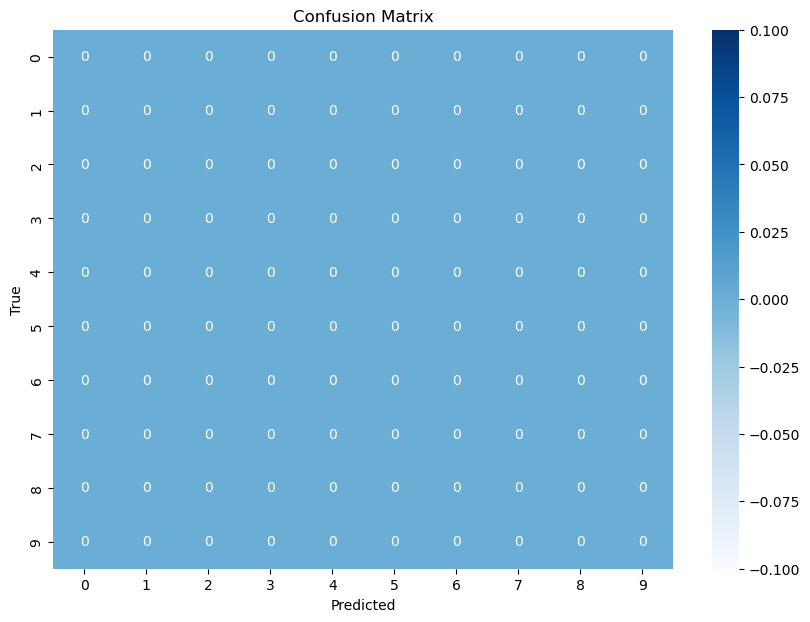

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.88      0.96      0.92      1000
           2       0.84      0.67      0.75      1000
           3       0.79      0.59      0.67      1000
           4       0.83      0.76      0.79      1000
           5       0.81      0.74      0.78      1000
           6       0.71      0.94      0.81      1000
           7       0.83      0.89      0.86      1000
           8       0.89      0.91      0.90      1000
           9       0.82      0.92      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



NameError: name 'plot_training_history' is not defined

In [28]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

# Define the function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot a few test images, true labels, and predicted labels
def plot_test_images(X_test, y_test, y_pred, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[i])
        true_label = np.argmax(y_test[i])
        predicted_label = y_pred[i]
        ax.set_title(f"True: {true_label}, Pred: {predicted_label}")
        ax.axis('off')
    plt.show()

# Function to test on a single image
def test_single_image(cnn, X_test, y_test, index=0):
    img = X_test[index:index+1]  # Select one image
    true_label = np.argmax(y_test[index])  # True label for the selected image
    
    # Predict the label for the image
    predicted_label = np.argmax(cnn.predict(img))
    
    # Plot the image with the predicted and true label
    plt.imshow(img[0])
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
    plt.show()

# Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Ensure the target variable is in multiclass format
y_train_class = np.argmax(y_train, axis=1)  # Convert one-hot encoded labels to class indices

# Perform Stratified K-Fold Cross-Validation
for fold, (train_indices, val_indices) in enumerate(stratified_kfold.split(X_train, y_train_class)):
    print(f"Training fold {fold + 1}...")
    
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

    # Create the CNN model
    cnn = create_model()

    # Train the model on the current fold
    history = cnn.fit(
        datagen.flow(X_train_fold, y_train_fold, batch_size=32),
        epochs=50,
        steps_per_epoch=len(X_train_fold) // 32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stop, lr_scheduler]
    )
    
    # Evaluate on the test set after each fold
    test_loss, test_accuracy, test_precision, test_recall, test_f1 = cnn.evaluate(X_test, y_test)
    
    # Print the evaluation results
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")
    print(f"Test F1-score: {test_f1}")

    # Get predictions and plot confusion matrix
    y_pred = np.argmax(cnn.predict(X_test), axis=-1)  # Get predicted classes
    y_true = np.argmax(y_test, axis=-1)  # True labels in class indices

    # Define the class labels (CIFAR-10 has 10 classes)
    class_labels = [str(i) for i in range(10)]
    
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, class_labels)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    
    # Optionally, plot training history after each fold
    plot_training_history(history)
    
    # Test on one image from the test set
    test_single_image(cnn, X_test, y_test, index=0)

    # Plot the first 10 test images along with true and predicted labels
    plot_test_images(X_test, y_test, y_pred, num_images=10)
